Create a Test Set

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.impute import SimpleImputer

In [20]:
df = pd.read_csv('datasets/housing/housing.csv')

<AxesSubplot: >

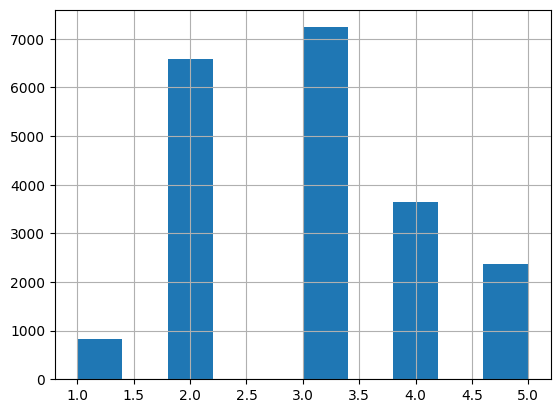

In [21]:
df['income_cat'] = pd.cut(df['median_income'] , bins=[0. , 1.5 , 3.0 , 4.5 , 6.0 , np.inf]  , labels=[1,2,3,4,5])
df['income_cat'].hist()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index , test_index in split.split(df , df['income_cat']):
    start_train_set = df.loc[train_index]
    start_test_set  = df.loc[test_index]

In [24]:
start_test_set['income_cat'].value_counts()/len(start_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [25]:
for set_ in (start_train_set , start_test_set):
    set_.drop('income_cat' , axis = 1 , inplace = True)

In [26]:
start_train_set.to_csv('datasets/housing/Housing_train_set.csv' , index=False)
start_test_set.to_csv('datasets/housing/Housing_test_set.csv'   , index=False)

In [27]:
housing = start_train_set.drop('median_house_value' , axis = 1)
housing_labels   = start_train_set['median_house_value'].copy()
housing.to_csv('datasets/housing/housing_predictors')
housing_labels.to_csv('datasets/housing/housing_labels')

In [28]:
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity' , axis = 1)
housing_num.to_csv('datasets/housing/housing_predictors_without_categorial_data')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x , columns=housing_num.columns , index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [32]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [35]:
from sklearn.preprocessing import OneHotEncoder

oneHot_encoding = OneHotEncoder()
housing_cat_encoding = oneHot_encoding.fit_transform(housing_cat)
housing_cat_encoding.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [34]:
oneHot_encoding.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]